# Exploring Dandiset 001349: GABAergic Inputs Shape Neuronal Subnetworks in the Primary Somatosensory Cortex

*AI-assisted notebook generation — please verify code and results before relying on them for research.*

This notebook provides an introduction to Dandiset 001349, a publicly available dataset hosted on the DANDI Archive, focused on calcium imaging data from the developing mouse somatosensory cortex. The notebook demonstrates how to access, inspect, and visualize the data using Python.

**Dandiset overview and original data:**  
[DANDI:001349, version 0.250520.1729](https://dandiarchive.org/dandiset/001349/0.250520.1729)

## What you'll find in this notebook:
- A high-level overview of the Dandiset: experimental context, data types, and organization
- Instructions and code for accessing DANDI assets programmatically
- Detailed exploration of a representative NWB file, including data structure, available signals, and metadata
- Visualizations of imaging data (ROIs and traces) to help orient new users

---
**Required packages:**  
This notebook assumes the following Python packages are already installed:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `pandas`

(If any are missing, please refer to their documentation for installation.)

---

## About the dataset
These data are from two-photon calcium imaging of the primary somatosensory cortex in postnatal developing mice (P11 to P21), combined with behavioral video recordings. Optical recordings are provided in Neurodata Without Borders (NWB) format and include processed calcium signals (e.g., DF/F, z-score, event traces), imaging metadata, and segmentation results.

---

## 1. Accessing the Dandiset and Listing Available Assets

We'll use the DANDI Python API to programmatically access the dataset and list available files in version 0.250520.1729. This approach allows us to search and load specific files efficiently, especially for large Dandisets.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to the DANDI Archive using the API client
client = DandiAPIClient()

# Specify Dandiset ID and version
dandiset_id = "001349"
dandiset_version = "0.250520.1729"

# Get the Dandiset object
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List all NWB assets in the Dandiset
print("Listing NWB assets in the Dandiset:")
nwb_assets = []
for asset in dandiset.get_assets():
    if asset.path.endswith('.nwb'):
        nwb_assets.append(asset)
        print(asset.path)

# Select a representative NWB file for further exploration
example_asset_path = "sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb"
print("\nExample NWB file for this notebook:", example_asset_path)

Listing NWB assets in the Dandiset:
sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-2_ophys.nwb
sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-1_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-2_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-3_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-0_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-4_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-1_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-11_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-12_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-13_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-14_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-15_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-10_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-16_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-17_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-18_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-19_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-20_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-24_ophys.nwb
sub-C57-C2-1-AL/sub-C57-C2-1-AL_ses-22_o

sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-10_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-11_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-12_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-14_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-13_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-3_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-15_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-4_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-5_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-6_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-8_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-7_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-18_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-16_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-17_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-19_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-20_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-21_ophys.nwb
sub-C57-C2-1-BR/sub-C57-C2-1-BR_ses-22_ophys.nwb
sub-C57-C2-2-AL/sub-C57-C2-2-AL_ses-0_ophys.nwb
sub-C57-C2-2-AL/sub-C57-C2-

## 2. Loading an NWB File Remotely

For this demonstration, we'll stream (not download) a representative NWB file from the Dandiset directly. This avoids taking up local storage and is ideal for initial exploration.

**Note:** All code below is based on remote streaming; any access delays are due to network latency.

In [2]:
import h5py
import remfile
import pynwb

# Retrieve the download URL for our example NWB file
url = next(dandiset.get_assets_by_glob(example_asset_path)).download_url

# Stream the remote NWB file using remfile + h5py
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, "r")

# Use pynwb to read the NWB structure
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwbfile = io.read()

print("Loaded NWB file:", nwbfile.identifier)
print("Session description:", nwbfile.session_description)
print("Session start time:", nwbfile.session_start_time)
print("Subject ID:", nwbfile.subject.subject_id, "| Age:", nwbfile.subject.age, "| Sex:", nwbfile.subject.sex)

Loaded NWB file: C57-C2-2-AL_2
Session description: CNOInjection: +; P15CNO: Neg
Session start time: 2021-10-29 00:00:00-05:00
Subject ID: C57-C2-2-AL | Age: P11D | Sex: F


## 3. Overview of NWB File Content

Each NWB file contains optical physiology (calcium imaging) data for a single imaging session, including processed traces, segmentation results, and metadata.  
Let's print some key metadata and explore the available processing modules and data interfaces.

In [3]:
# Print general metadata and available processing modules
print("Institution:", nwbfile.institution)
print("Data collection:", nwbfile.data_collection)
print("Experimenter(s):", nwbfile.experimenter)
print("Session ID:", nwbfile.session_id)
print("Experiment description:", nwbfile.experiment_description)

print("\nProcessing modules in NWB file:")
for name in nwbfile.processing:
    print(" -", name)

# List data interfaces available in the ophys processing module
ophys = nwbfile.processing["ophys"]
print("\nData interfaces in 'ophys':")
for name in ophys.data_interfaces:
    print(" -", name)

Institution: Indiana University Bloomington
Data collection: Two-photon calcium imaging
Experimenter(s): ('Edna',)
Session ID: 2
Experiment description: Mouse behavior and neural imaging

Processing modules in NWB file:
 - ophys

Data interfaces in 'ophys':
 - Fluorescence
 - ImageSegmentation


## 4. Exploring Imaging Data and ROI Segmentation

The 'ophys' processing module contains calcium imaging data in various forms: raw fluorescence, neuropil-corrected traces, deltaF/F, event detection traces, z-score normalization, and more. These data are all stored as `RoiResponseSeries` objects and refer to the same set of segmented ROIs ("cells").

Let's inspect the PlaneSegmentation table (which stores ROI shapes and identities) and check how many ROIs are present.

In [4]:
# Access segmentation structure
plane_segmentation = ophys.data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation_1"]
print("PlaneSegmentation description:", plane_segmentation.description)
print("ROI colnames:", plane_segmentation.colnames)
print("Number of ROIs (cells):", len(plane_segmentation.id))

# Show first few ROI IDs
import pandas as pd
df_rois = plane_segmentation.to_dataframe()
print("\nFirst few rows of ROI segmentation table:")
display(df_rois.head())

PlaneSegmentation description: output from segmenting
ROI colnames: ('pixel_mask',)
Number of ROIs (cells): 143

First few rows of ROI segmentation table:


,pixel_mask
id,
7,"[[195, 233, 0.8797294], [196, 233, 1.1540956],..."
8,"[[13, 267, 0.98032975], [14, 267, 0.5083171], ..."
9,"[[322, 68, 0.70999473], [323, 68, 1.1739655], ..."
11,"[[420, 338, 1.185967], [421, 338, 2.0150337], ..."
12,"[[191, 139, 1.0358119], [192, 139, 1.2613564],..."


## 5. Plotting Imaging Field ROIs

Each ROI is stored in the segmentation table as a `pixel_mask` array (a list of pixel coordinates and weights in the field of view).
Let's visualize the spatial distribution of the ROIs overlayed on a blank imaging field (relative, since no mean image is included in this NWB structure).

**Note:** Each entry in `pixel_mask` may be an empty list or a 1D array if the ROI isn't defined properly (rare but possible). We'll skip any such ROI.

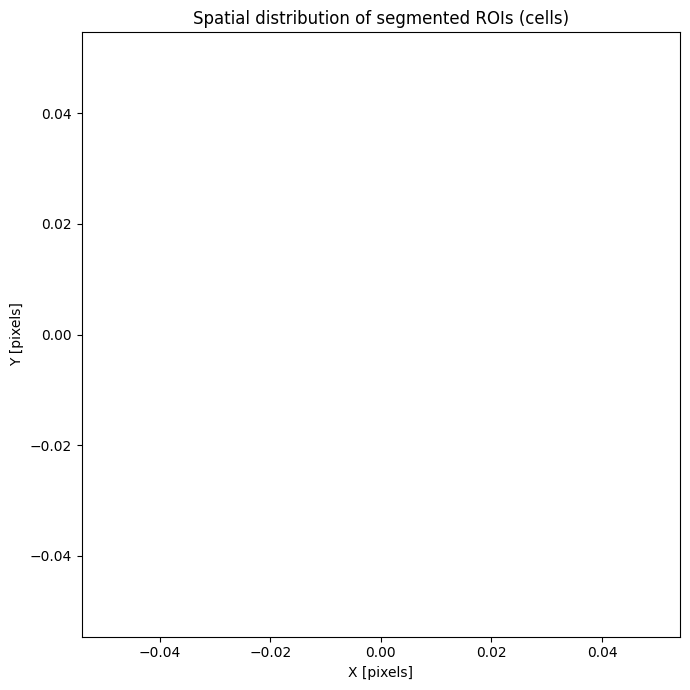

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
for pixel_mask in df_rois["pixel_mask"]:
    # Ensuring pixel_mask is not empty and has the correct structure
    if len(pixel_mask) == 0:
        continue
    coords = np.array(pixel_mask)
    # Some pixel_masks may be 1D if just a single pixel, convert to appropriate shape
    if coords.ndim == 1:
        if coords.shape[0] == 3:  # likely a single (x, y, weight) triplet
            coords = coords.reshape(1, 3)
        else:
            continue  # Structure is not as expected, skip
    if coords.shape[1] < 2:
        continue
    plt.scatter(coords[:, 0], coords[:, 1], s=0.5, alpha=0.2, color='blue')
plt.title("Spatial distribution of segmented ROIs (cells)")
plt.xlabel("X [pixels]")
plt.ylabel("Y [pixels]")
plt.axis('equal')
plt.tight_layout()
plt.show()

## 6. Access and Visualize Calcium Traces

The NWB file stores several types of traces per ROI:
- Raw fluorescence
- Neuropil-corrected fluorescence
- DeltaF/F (dff)
- Event-detected traces (ca_events)
- Z-scored traces

All traces are sampled at ~15.23 Hz and have shape `[time, n_rois]`.
Let's plot a segment of the deltaF/F and event-detected traces for a handful of example ROIs.

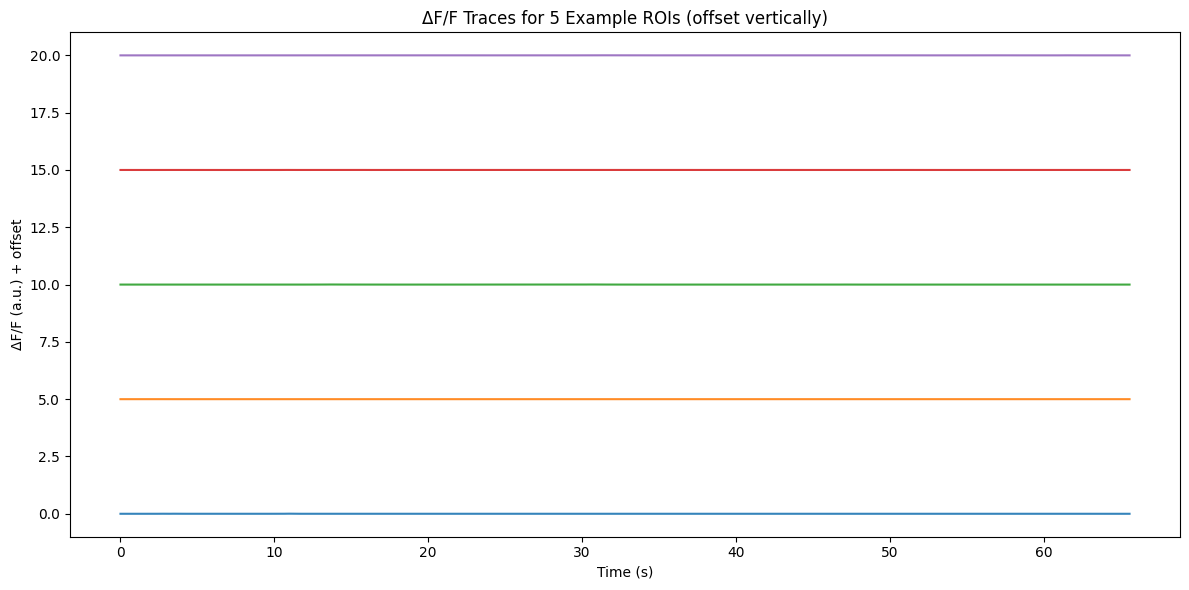

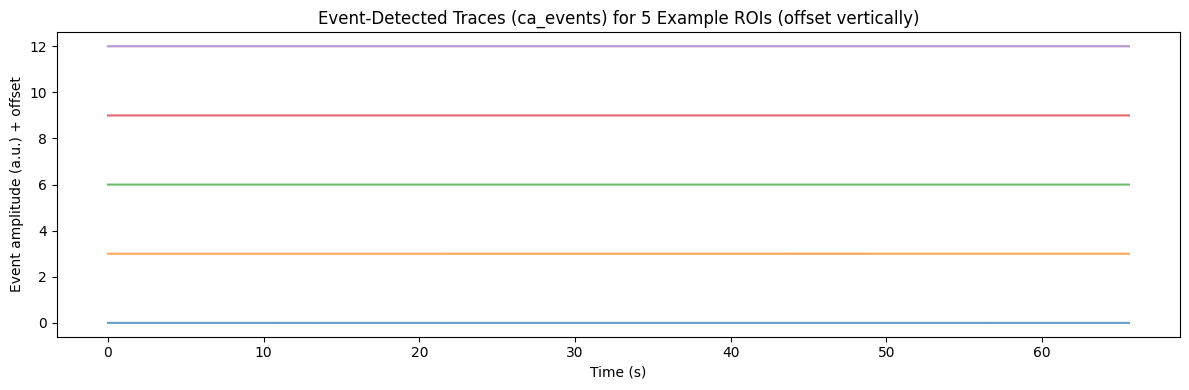

In [6]:
# Get dff and ca_events traces
dff = ophys.data_interfaces["Fluorescence"].roi_response_series["dff_chn0"].data  # shape (time, rois)
ca_events = ophys.data_interfaces["Fluorescence"].roi_response_series["ca_events_chn0"].data

# Get time vector — 'rate' field is available
rate = ophys.data_interfaces["Fluorescence"].roi_response_series["dff_chn0"].rate
time = np.arange(dff.shape[0]) / rate

n_plot = 5  # Plot for first 5 ROIs
plt.figure(figsize=(12, 6))
for idx in range(n_plot):
    plt.plot(time[:1000], dff[:1000, idx] + idx*5, label=f'ROI {idx} dF/F', alpha=0.9)
plt.xlabel("Time (s)")
plt.title("ΔF/F Traces for 5 Example ROIs (offset vertically)")
plt.ylabel("ΔF/F (a.u.) + offset")
plt.tight_layout()
plt.show()

# Plot corresponding event traces for the same ROIs
plt.figure(figsize=(12, 4))
for idx in range(n_plot):
    plt.plot(time[:1000], ca_events[:1000, idx] + idx*3, label=f'ROI {idx} Ca Events', alpha=0.7)
plt.xlabel("Time (s)")
plt.title("Event-Detected Traces (ca_events) for 5 Example ROIs (offset vertically)")
plt.ylabel("Event amplitude (a.u.) + offset")
plt.tight_layout()
plt.show()

## 7. Comparing Different Fluorescence Measures

This section demonstrates differences between various fluorescence measures for one ROI (cell), showing the progression from raw fluorescence, to neuropil-corrected, to z-scored and event-processed signals.

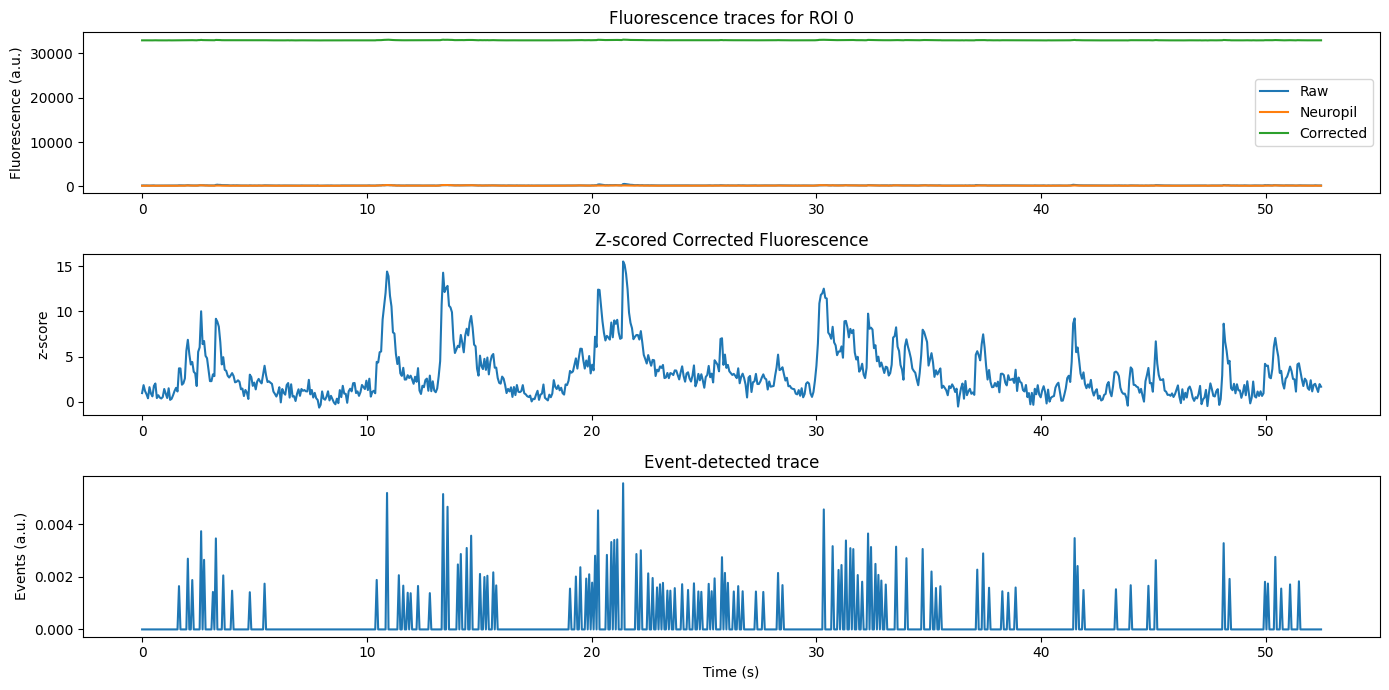

In [7]:
roi_idx = 0  # Select an example ROI

f_raw = ophys.data_interfaces["Fluorescence"].roi_response_series["fluorescence_chn0"].data[:, roi_idx]
f_neuropil = ophys.data_interfaces["Fluorescence"].roi_response_series["neuropil_fluorescence_chn0"].data[:, roi_idx]
f_corrected = ophys.data_interfaces["Fluorescence"].roi_response_series["f_corrected_chn0"].data[:, roi_idx]
z_score = ophys.data_interfaces["Fluorescence"].roi_response_series["z_score_chn0"].data[:, roi_idx]
ca_ev = ophys.data_interfaces["Fluorescence"].roi_response_series["ca_events_chn0"].data[:, roi_idx]

plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.plot(time[:800], f_raw[:800], label="Raw")
plt.plot(time[:800], f_neuropil[:800], label="Neuropil")
plt.plot(time[:800], f_corrected[:800], label="Corrected")
plt.legend()
plt.ylabel("Fluorescence (a.u.)")
plt.title(f"Fluorescence traces for ROI {roi_idx}")

plt.subplot(3, 1, 2)
plt.plot(time[:800], z_score[:800])
plt.ylabel("z-score")
plt.title("Z-scored Corrected Fluorescence")

plt.subplot(3, 1, 3)
plt.plot(time[:800], ca_ev[:800])
plt.ylabel("Events (a.u.)")
plt.xlabel("Time (s)")
plt.title("Event-detected trace")

plt.tight_layout()
plt.show()

## 8. Imaging Metadata Overview

Metadata for the imaging plane is attached to both the segmentation and the traces. Let's inspect the main parameters.

In [8]:
img_plane = nwbfile.imaging_planes["ImagingPlane_1_chn1"]

print("Imaging plane location:", img_plane.location)
print("Imaging rate (Hz):", img_plane.imaging_rate)
print("Optical indicator:", img_plane.indicator)
print("Device:", img_plane.device.description, "| Manufacturer:", img_plane.device.manufacturer)
print("Grid spacing (pixels):", img_plane.grid_spacing[:], "| Grid spacing unit:", img_plane.grid_spacing_unit)
print("Origin coordinates (pixels):", img_plane.origin_coords[:])

Imaging plane location: hemisphere: right, layer: 2, location_id: 2
Imaging rate (Hz): 15.2309
Optical indicator: unknown
Device: Two photon microscope | Manufacturer: Microscope manufacturer
Grid spacing (pixels): [1. 1.] | Grid spacing unit: pixels
Origin coordinates (pixels): [0. 0. 0.]


## 9. Summary and Next Steps

In this notebook, you have seen how to:
- Browse and stream-access NWB assets in Dandiset 001349 via the DANDI Python API
- Explore the internal organization of the NWB files, including segmentation (ROIs), processed calcium traces, and extensive metadata
- Visualize both the ROI distribution and various fluorescence signals, helping to orient analysis efforts

**Next steps and suggestions:**
- Link ROI traces with behavioral video timestamps (outside scope here, but synchrony data is available)
- Use event traces and dF/F for further analysis (e.g., correlation, clustering, developmental changes)
- Explore data across multiple sessions, mice, or intervention conditions listed in the metadata

Please consult the [Dandiset landing page](https://dandiarchive.org/dandiset/001349/0.250520.1729) for further documentation and related publications.

---

*Notebook generated with the assistance of AI. Please verify code and outputs before publication or further analysis!*